Fashion MNIST Classification using FNN

In [48]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

In [49]:
if torch.cuda.is_available():
    device = torch.device('cuda')
    print("Using CUDA")
else:
    device = torch.device('cpu')
    print('Using CPU')

Using CUDA


In [50]:
df = pd.read_csv("fashion-mnist_train.csv")
df.head()
df.shape

(60000, 785)

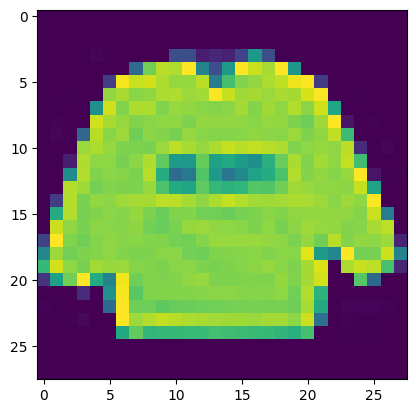

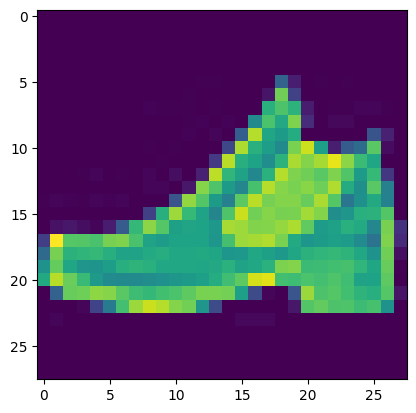

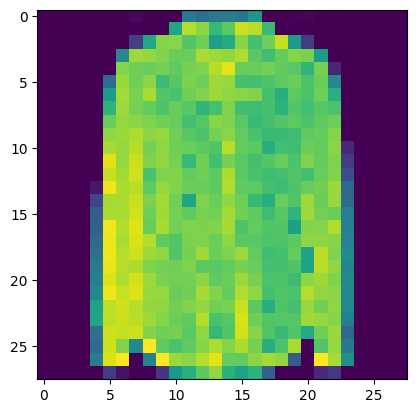

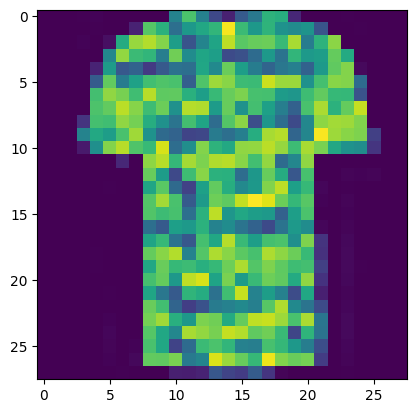

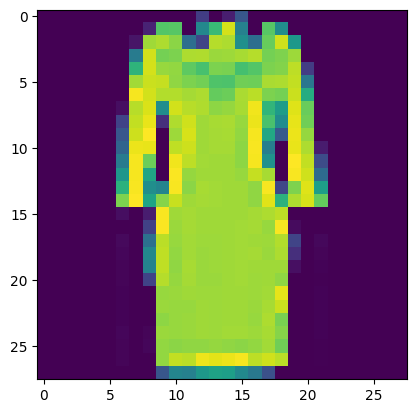

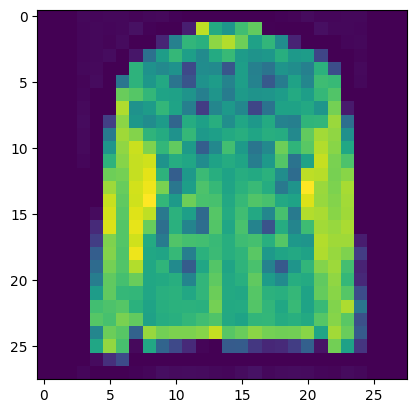

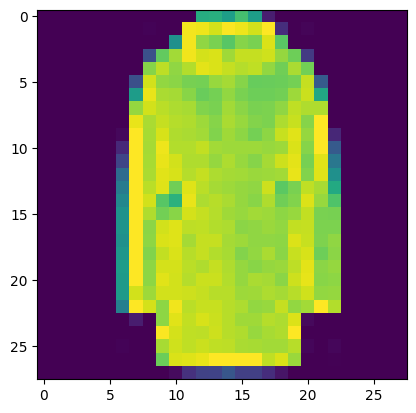

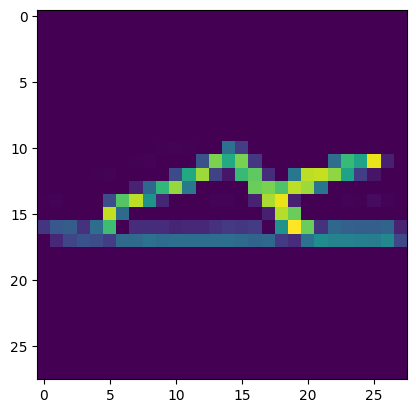

In [51]:
for i in range(8):
    image = df.iloc[i,1:].values.reshape(28,28)
    plt.imshow(image)
    plt.show()


In [52]:
X_train = df.iloc[:,1:].values
y_train = df.iloc[:,0].values

In [53]:
df_test = pd.read_csv('fashion-mnist_test.csv')
df_test.head()
df_test.shape

(10000, 785)

In [54]:
X_test = df_test.iloc[:,1:].values
y_test = df_test.iloc[:,0].values

In [55]:
X_train = X_train/255.0
X_test = X_test/255.0

In [56]:
class customDataset(Dataset):
    def __init__(self,features, target):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.target = torch.tensor(target,dtype = torch.long)
    def __len__(self):
        return len(self.features)
    def __getitem__(self, index):
        return self.features[index],self.target[index]

In [57]:
train_dataset = customDataset(X_train, y_train)
test_dataset = customDataset(X_test, y_test)
train_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0157, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.2431, 0.2392, 0.0824, 0.1137, 0.0902,
         0.2000, 0.5333, 0.2392, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [58]:
train_loader = DataLoader(train_dataset, batch_size = 200, shuffle=True, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size = 200, shuffle= False,pin_memory=True)

In [59]:
len(test_loader), len(train_loader)

(50, 300)

In [60]:
#Build the Neural Network
class FNN(nn.Module):
    def __init__(self, num_features):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(num_features,128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(p = 0.3),
            nn.Linear(128,64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(p = 0.3),
            nn.Linear(64,10)
        )

    def forward(self,X):
        output = self.network(X)
        return output

In [61]:
model = FNN(X_train.shape[1])
model = model.to(device)

In [62]:
epochs = 100
learning_rate = 0.1
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr = learning_rate, weight_decay=1e-4)

In [63]:
#Training Loop
for epoch in range(epochs):
    total_epoch_loss = 0
    no_of_batches = 0
    for X_batch, y_batch in train_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)
        output = model(X_batch)
        loss = criterion(output,y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_epoch_loss += loss.item()
        no_of_batches += 1
    print(f'Epoch: {epoch+1} Loss {total_epoch_loss/no_of_batches}')

Epoch: 1 Loss 0.6663245849808057
Epoch: 2 Loss 0.48078005502621335
Epoch: 3 Loss 0.44115455836057665
Epoch: 4 Loss 0.4158695556720098
Epoch: 5 Loss 0.3991347532471021
Epoch: 6 Loss 0.38486453558007877
Epoch: 7 Loss 0.3750076386332512
Epoch: 8 Loss 0.36619005079070727
Epoch: 9 Loss 0.3512655179699262
Epoch: 10 Loss 0.3458250544468562
Epoch: 11 Loss 0.3402184336880843
Epoch: 12 Loss 0.3318276716272036
Epoch: 13 Loss 0.3253428137302399
Epoch: 14 Loss 0.3235580676794052
Epoch: 15 Loss 0.31597946032881735
Epoch: 16 Loss 0.3108140360812346
Epoch: 17 Loss 0.30603131716450055
Epoch: 18 Loss 0.30291270549098653
Epoch: 19 Loss 0.2981483340760072
Epoch: 20 Loss 0.2934623710314433
Epoch: 21 Loss 0.2907264426847299
Epoch: 22 Loss 0.287529187053442
Epoch: 23 Loss 0.28366337314248086
Epoch: 24 Loss 0.2813629299402237
Epoch: 25 Loss 0.27622587929169334
Epoch: 26 Loss 0.2745128939052423
Epoch: 27 Loss 0.272412471473217
Epoch: 28 Loss 0.2698397678633531
Epoch: 29 Loss 0.26543852215011915
Epoch: 30 Loss 

In [65]:
#Evaluation
model.eval()
total = 0
correct_value = 0
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)
        output = model(X_batch)
        _,pred_label = torch.max(output,1)
        total = total + X_batch.shape[0]
        correct_value = correct_value + (pred_label==y_batch).sum().item()
print(correct_value/total)


0.8911


In [66]:
#Evaluation on trining set
model.eval()
total = 0
correct_value = 0
with torch.no_grad():
    for X_batch, y_batch in train_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)
        output = model(X_batch)
        _,pred_label = torch.max(output,1)
        total = total + X_batch.shape[0]
        correct_value = correct_value + (pred_label==y_batch).sum().item()
print(correct_value/total)

0.9495333333333333
